# Task 1 - Distribution of genes among the different clusters - 1_9591_TEBBO
This notebook analyses the distribution of individual genes among the different clusters.

This notebook is based on the single-cell tutorial (https://github.com/theislab/single-cell-tutorial). For further explanations of the applied methods please refer to above source.

In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import os
from os import listdir
from os.path import isfile, join
import logging

In [2]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3

### Load adata

In [3]:
adata = sc.read_h5ad('../data/adata/rev_processed_adata1.h5ad')
adata.obs

sample_id sample_nr  donor  \
AAACCCAAGCGTCTGC-1-0-0-0-0-0-0  1_9591_TEBBO         0  mouse   
AAACCCACAGCAGTTT-1-0-0-0-0-0-0  1_9591_TEBBO         0  mouse   
AAACCCACAGGTCAAG-1-0-0-0-0-0-0  1_9591_TEBBO         0  mouse   
AAACCCACATTCCTAT-1-0-0-0-0-0-0  1_9591_TEBBO         0  mouse   
AAACCCATCGAAGGAC-1-0-0-0-0-0-0  1_9591_TEBBO         0  mouse   
...                                      ...       ...    ...   
TTTGTTGAGTAACCGG-1-0-0-0-0-0-0  1_9591_TEBBO         0  mouse   
TTTGTTGCAATTGAGA-1-0-0-0-0-0-0  1_9591_TEBBO         0  mouse   
TTTGTTGCAGCACCCA-1-0-0-0-0-0-0  1_9591_TEBBO         0  mouse   
TTTGTTGCATAGACTC-1-0-0-0-0-0-0  1_9591_TEBBO         0  mouse   
TTTGTTGTCTGTGCAA-1-0-0-0-0-0-0  1_9591_TEBBO         0  mouse   

                                n_genes_by_counts  log1p_n_genes_by_counts  \
AAACCCAAGCGTCTGC-1-0-0-0-0-0-0               6425                 8.768108   
AAACCCACAGCAGTTT-1-0-0-0-0-0-0               7388                 8.907748   
AAACCCACAGGTCAAG-1-0-0-0-0-0-0               6240                 8.738896   
AAACCCACATTCCTAT-1-0-0-0-0-0-0               1079                 6.984716   
AAACCCATCGAAGGAC-1-0-0-0-0-0-0               6506                 8.780634   
...                                           ...                      ...   
TTTGTTGAGTAACCGG-1-0-0-0-0-0-0                351                 5.863631   
TTTGTTGCAATTGAGA-1-0-0-0-0-0-0               6586                 8.792853   
TTTGTTGCAGCACCCA-1-0-0-0-0-0-0               6287                 8.746398   
TTTGTTGCATAGACTC-1-0-0-0-0-0-0               6521                 8.782936   
TTTGTTGTCTGTGCAA-1-0-0-0-0-0-0                427                 6.059123   

                                total_counts  log1p_total_counts  \
AAACCCAAGCGTCTGC-1-0-0-0-0-0-0       33471.0           10.418465   
AAACCCACAGCAGTTT-1-0-0-0-0-0-0       53954.0           10.895905   
AAACCCACAGGTCAAG-1-0-0-0-0-0-0       32445.0           10.387333   
AAACCCACATTCCTAT-1-0-0-0-0-0-0        1787.0            7.488853   
AAACCCATCGAAGGAC-1-0-0-0-0-0-0       36774.0           10.512573   
...                                      ...                 ...   
TTTGTTGAGTAACCGG-1-0-0-0-0-0-0         613.0            6.419995   
TTTGTTGCAATTGAGA-1-0-0-0-0-0-0       39274.0           10.578343   
TTTGTTGCAGCACCCA-1-0-0-0-0-0-0       33356.0           10.415023   
TTTGTTGCATAGACTC-1-0-0-0-0-0-0       33415.0           10.416790   
TTTGTTGTCTGTGCAA-1-0-0-0-0-0-0         540.0            6.293419   

                                pct_counts_in_top_50_genes  \
AAACCCAAGCGTCTGC-1-0-0-0-0-0-0                   21.947357   
AAACCCACAGCAGTTT-1-0-0-0-0-0-0                   20.773251   
AAACCCACAGGTCAAG-1-0-0-0-0-0-0                   21.732162   
AAACCCACATTCCTAT-1-0-0-0-0-0-0                   25.853386   
AAACCCATCGAAGGAC-1-0-0-0-0-0-0                   23.851090   
...                                                    ...   
TTTGTTGAGTAACCGG-1-0-0-0-0-0-0                   48.450245   
TTTGTTGCAATTGAGA-1-0-0-0-0-0-0                   19.791720   
TTTGTTGCAGCACCCA-1-0-0-0-0-0-0                   25.320782   
TTTGTTGCATAGACTC-1-0-0-0-0-0-0                   19.006434   
TTTGTTGTCTGTGCAA-1-0-0-0-0-0-0                   29.444444   

                                pct_counts_in_top_100_genes  \
AAACCCAAGCGTCTGC-1-0-0-0-0-0-0                    30.028980   
AAACCCACAGCAGTTT-1-0-0-0-0-0-0                    30.629796   
AAACCCACAGGTCAAG-1-0-0-0-0-0-0                    31.502543   
AAACCCACATTCCTAT-1-0-0-0-0-0-0                    34.750979   
AAACCCATCGAAGGAC-1-0-0-0-0-0-0                    33.700441   
...                                                     ...   
TTTGTTGAGTAACCGG-1-0-0-0-0-0-0                    59.053834   
TTTGTTGCAATTGAGA-1-0-0-0-0-0-0                    28.166217   
TTTGTTGCAGCACCCA-1-0-0-0-0-0-0                    36.272335   
TTTGTTGCATAGACTC-1-0-0-0-0-0-0                    28.292683   
TTTGTTGTCTGTGCAA-1-0-0-0-0-0-0                    39.444444   

In [4]:
adata.var

feature_types     mt gene_symbols-0-0-0-0-0-0  \
ENSMUSG00000051285  Gene Expression  False                   Pcmtd1   
ENSMUSG00000039748  Gene Expression  False                     Exo1   
ENSMUSG00000057363  Gene Expression  False                     Uxs1   
ENSMUSG00000038702  Gene Expression  False                     Dsel   
ENSMUSG00000033021  Gene Expression  False                    Gmppa   
...                             ...    ...                      ...   
ENSMUSG00000064367  Gene Expression  False                   mt-Nd5   
ENSMUSG00000064368  Gene Expression  False                   mt-Nd6   
ENSMUSG00000064370  Gene Expression  False                  mt-Cytb   
ENSMUSG00000095041  Gene Expression  False       ENSMUSG00000095041   
ENSMUSG00000095742  Gene Expression  False       ENSMUSG00000095742   

                    n_cells_by_counts-0-0-0-0-0-0  mean_counts-0-0-0-0-0-0  \
ENSMUSG00000051285                           4892                 2.636992   
ENSMUSG00000039748                            106                 0.029674   
ENSMUSG00000057363                           3639                 1.102132   
ENSMUSG00000038702                           1867                 0.416307   
ENSMUSG00000033021                           2448                 0.506338   
...                                           ...                      ...   
ENSMUSG00000064367                           6188                44.415154   
ENSMUSG00000064368                           5237                 4.979113   
ENSMUSG00000064370                           6703               183.073898   
ENSMUSG00000095041                           5425                 7.305099   
ENSMUSG00000095742                            638                 0.099395   

                    log1p_mean_counts-0-0-0-0-0-0  \
ENSMUSG00000051285                       1.291157   
ENSMUSG00000039748                       0.029243   
ENSMUSG00000057363                       0.742952   
ENSMUSG00000038702                       0.348052   
ENSMUSG00000033021                       0.409682   
...                                           ...   
ENSMUSG00000064367                       3.815846   
ENSMUSG00000064368                       1.788272   
ENSMUSG00000064370                       5.215337   
ENSMUSG00000095041                       2.116870   
ENSMUSG00000095742                       0.094760   

                    pct_dropout_by_counts-0-0-0-0-0-0  \
ENSMUSG00000051285                          29.530395   
ENSMUSG00000039748                          98.473063   
ENSMUSG00000057363                          47.579948   
ENSMUSG00000038702                          73.105733   
ENSMUSG00000033021                          64.736387   
...                                               ...   
ENSMUSG00000064367                          10.861423   
ENSMUSG00000064368                          24.560645   
ENSMUSG00000064370                           3.442812   
ENSMUSG00000095041                          21.852492   
ENSMUSG00000095742                          90.809565   

                    total_counts-0-0-0-0-0-0  log1p_total_counts-0-0-0-0-0-0  \
ENSMUSG00000051285                   18306.0                        9.815039   
ENSMUSG00000039748                     206.0                        5.332719   
ENSMUSG00000057363                    7651.0                        8.942722   
ENSMUSG00000038702                    2890.0                        7.969358   
ENSMUSG00000033021                    3515.0                        8.165079   
...                                      ...                             ...   
ENSMUSG00000064367                  308330.0                       12.638929   
ENSMUSG00000064368                   34565.0                       10.450625   
ENSMUSG00000064370                 1270899.0                       14.055236   
ENSMUSG00000095041                   50712.0                       10.833938   
ENSMUSG00000095742            

<a id="Clustering"></a>

## Clustering

In [6]:
# Perform clustering - using highly variable genes
# sc.tl.louvain(adata, key_added='louvain_r1')
sc.tl.louvain(adata, resolution=0.3, key_added='louvain_r0.3', random_state=10)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 5 clusters and added
    'louvain_r0.3', the cluster labels (adata.obs, categorical) (0:00:00)


In [7]:
adata.obs['louvain_r0.3'].value_counts()

louvain_r0.3
0    2279
1    2014
2    1728
3     467
4     380
Name: count, dtype: int64

/Users/till.richter/anaconda3/envs/celldreamer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


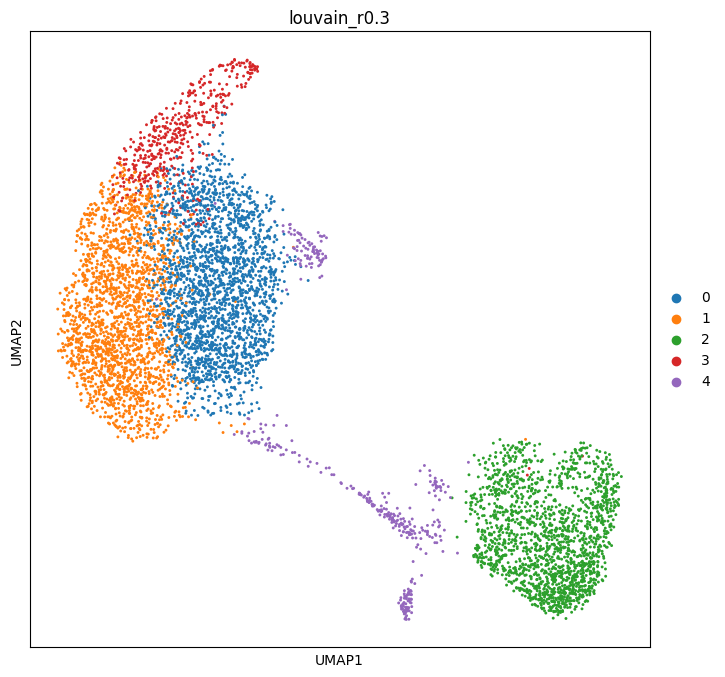

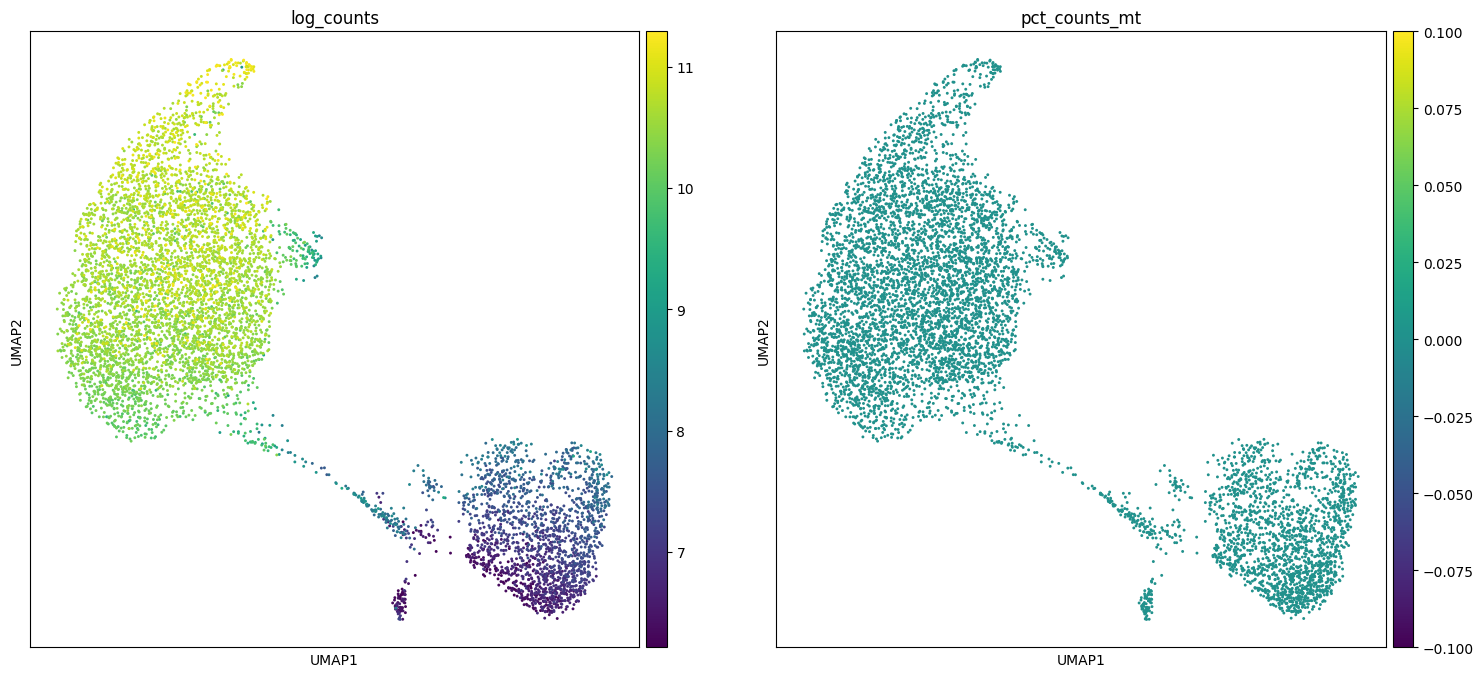

In [8]:
# Analysis sees 3 classes here
# Visualize the clustering and how this is reflected by different technical covariates
sc.pl.umap(adata, color=['louvain_r0.3'])

sc.pl.umap(adata, color=['log_counts', 'pct_counts_mt'])

/Users/till.richter/anaconda3/envs/celldreamer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


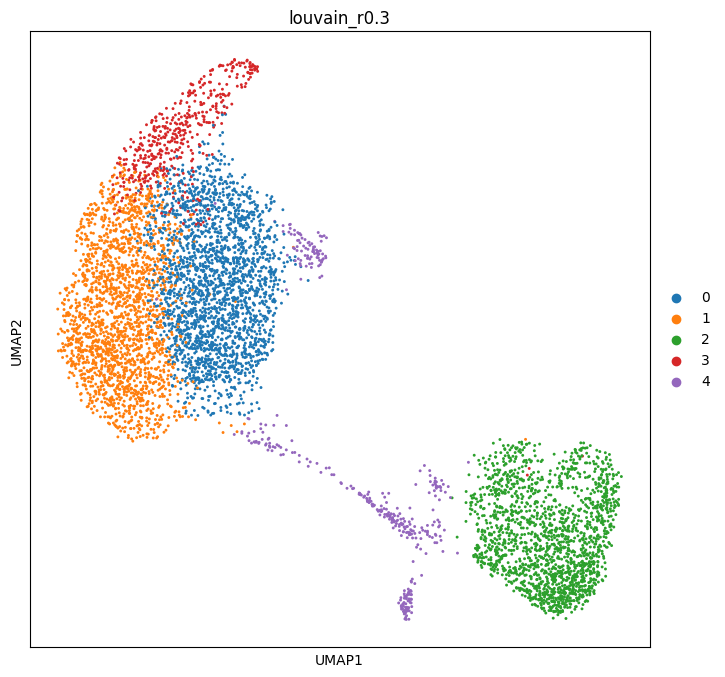

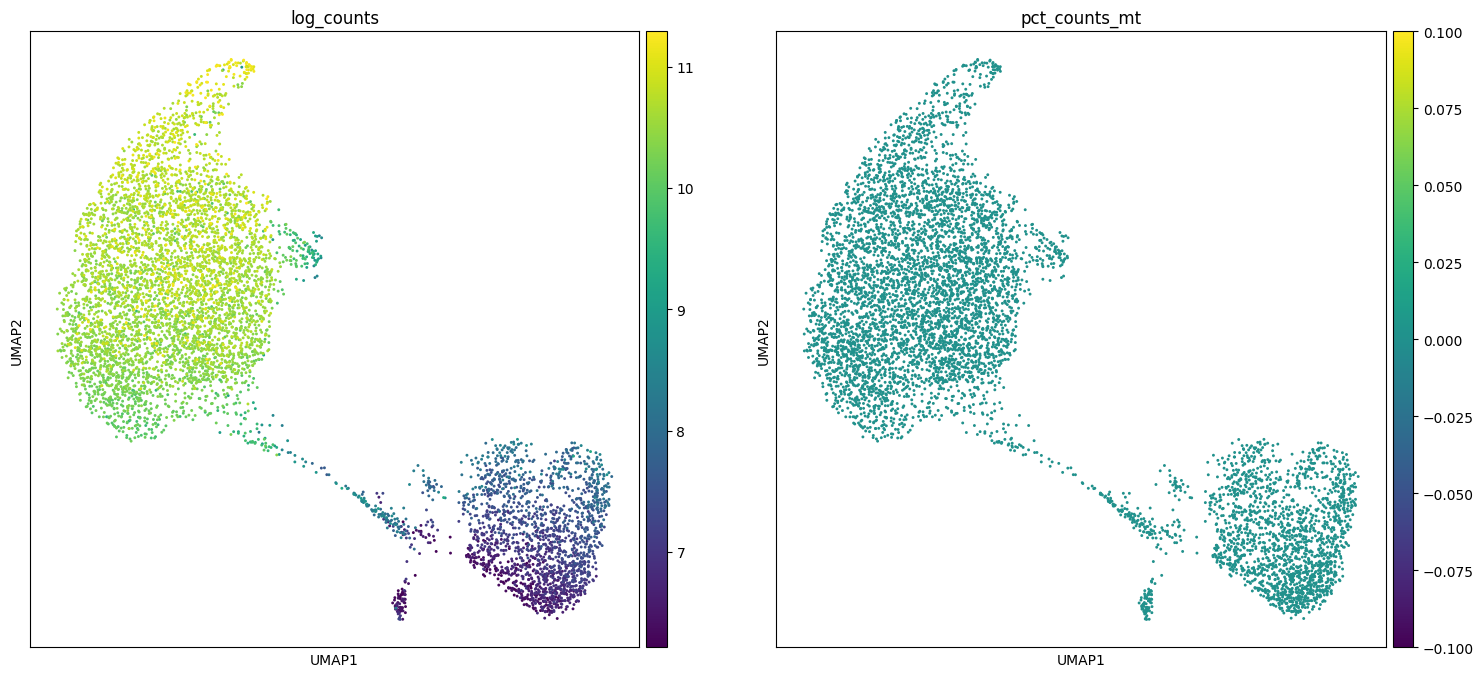

In [9]:
# Analysis sees 3 classes here
# Visualize the clustering and how this is reflected by different technical covariates
sc.pl.umap(adata, color=['louvain_r0.3'], save='umap_1_9591_TEBBO.pdf')
# os.rename("figures/umap1_9591_TEBBO.pdf", 
#           "../rev_results/task1/1_9591_TEBBO/UMAP.pdf")

sc.pl.umap(adata, color=['log_counts', 'pct_counts_mt'], save='umap_counts_1_9591_TEBBO.pdf')
# os.rename("figures/umap/1_9591_TEBBO/UMAP_counts.pdf", 
#           "../rev_results/task1/1_9591_TEBBO/UMAP_counts.pdf")

<a id="Markers"></a>

## Marker genes & cluster annotation

In [10]:
# Create a new AnnData object with gene symbols as var indices
adata_tmp = sc.AnnData(
    X=adata.X,  # Assuming you want to keep the same expression data
    obs=adata.obs.copy(),  # Copy the obs information from the original AnnData
)

# Set the gene symbols as var indices
adata_tmp.var.index = adata.var['gene_symbols-0-0-0-0-0-0']

In [11]:
# Perform gene ranking on the modified AnnData object
sc.tl.rank_genes_groups(adata_tmp, groupby='louvain_r0.3', key_added='rank_genes_r0.3')



ranking genes
    finished: added to `.uns['rank_genes_r0.3']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


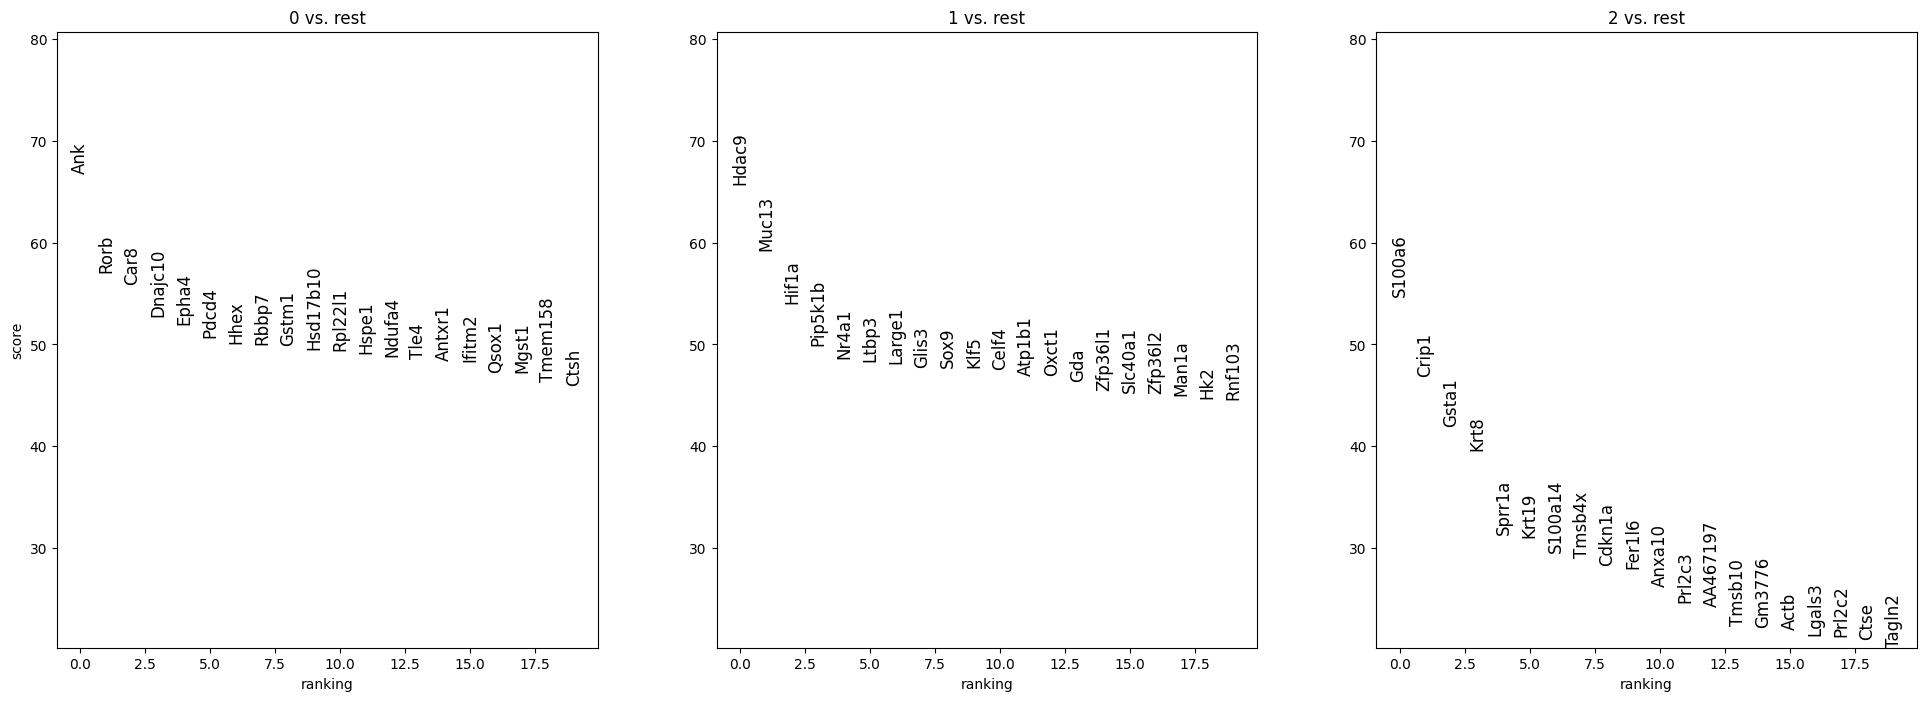

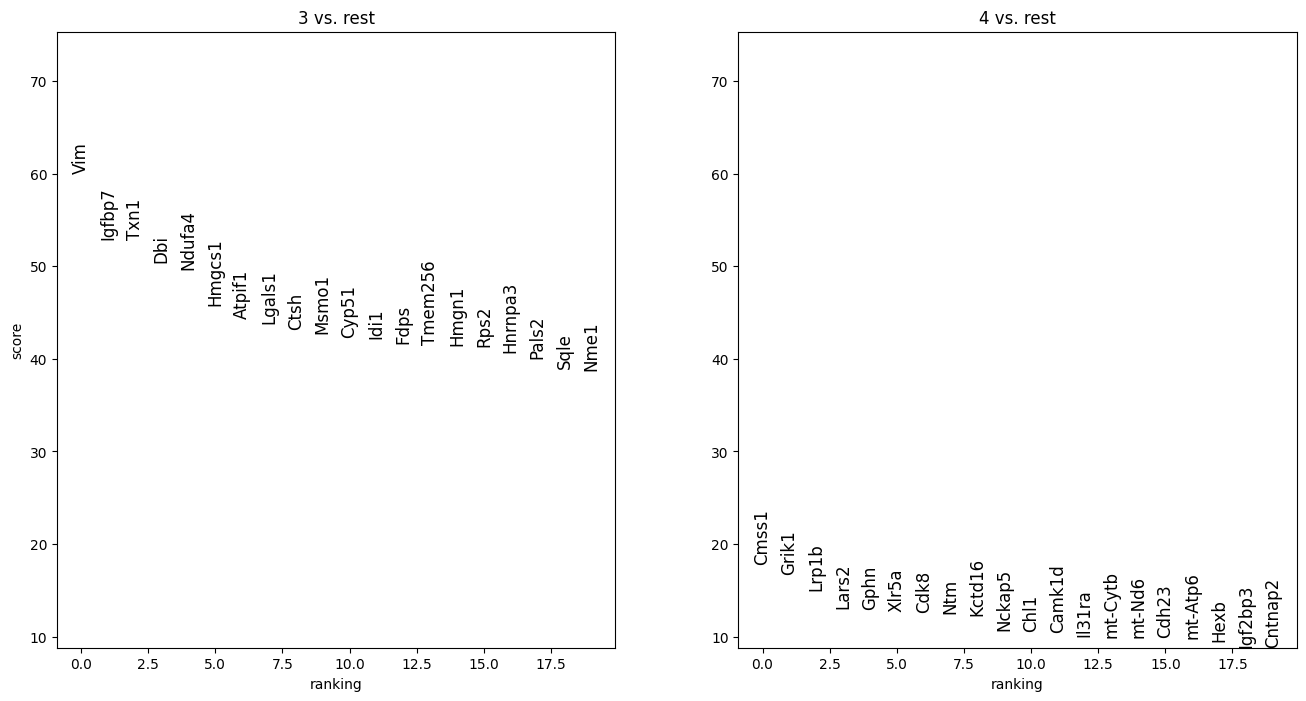

In [12]:
# Visualize the results using gene symbols
sc.pl.rank_genes_groups(adata_tmp, key='rank_genes_r0.3', groups=['0', '1', '2'], fontsize=12)
sc.pl.rank_genes_groups(adata_tmp, key='rank_genes_r0.3', groups=['3', '4'], fontsize=12)

In [13]:
# Define a nice colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

Below we plot genes of particular interest within the clusters

### Cluster 0

Encrypted symbol for  Ank is  ENSMUSG00000022265


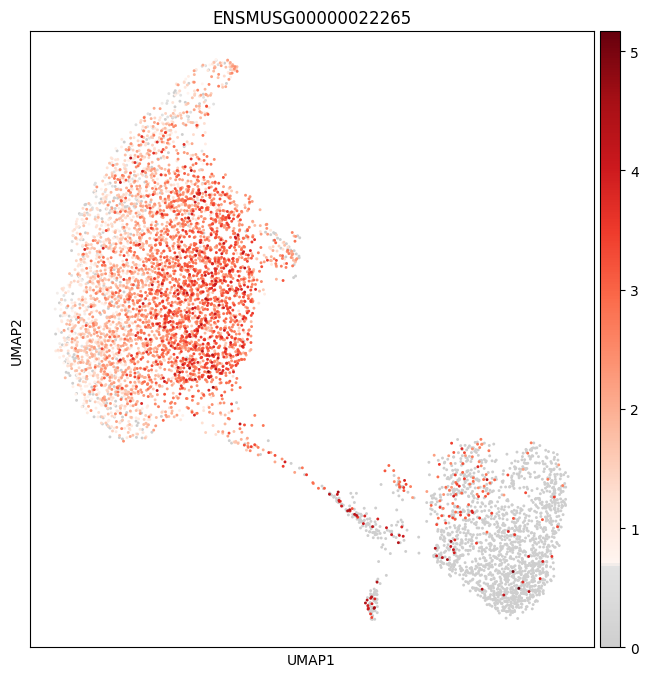

Encrypted symbol for  Rorb is  ENSMUSG00000036192


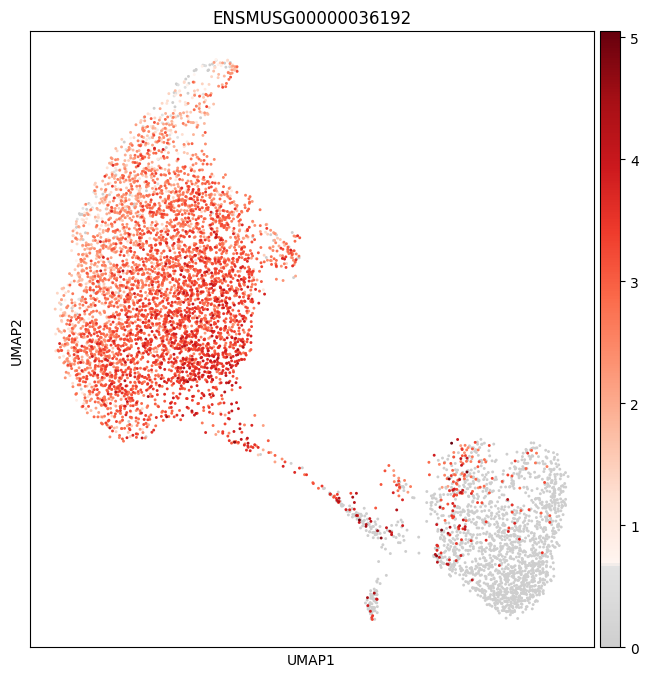

Encrypted symbol for  Car8 is  ENSMUSG00000041261


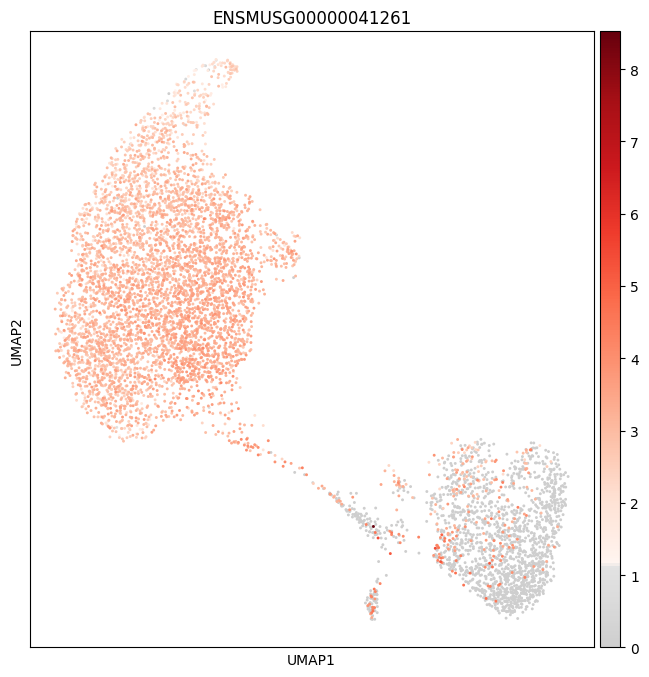

Encrypted symbol for  Dnajc10 is  ENSMUSG00000027006


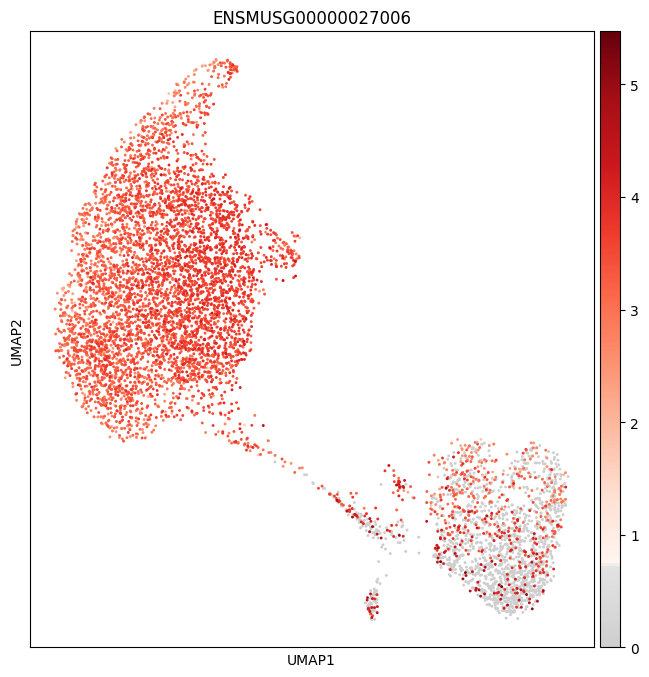

In [14]:
gene_symbols = ['Ank', 'Rorb', 'Car8', 'Dnajc10']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/1_9591_TEBBO_Cluster0_' + gene_symbol + '.pdf')


## Cluster 1

Encrypted symbol for  Hdac9 is  ENSMUSG00000004698


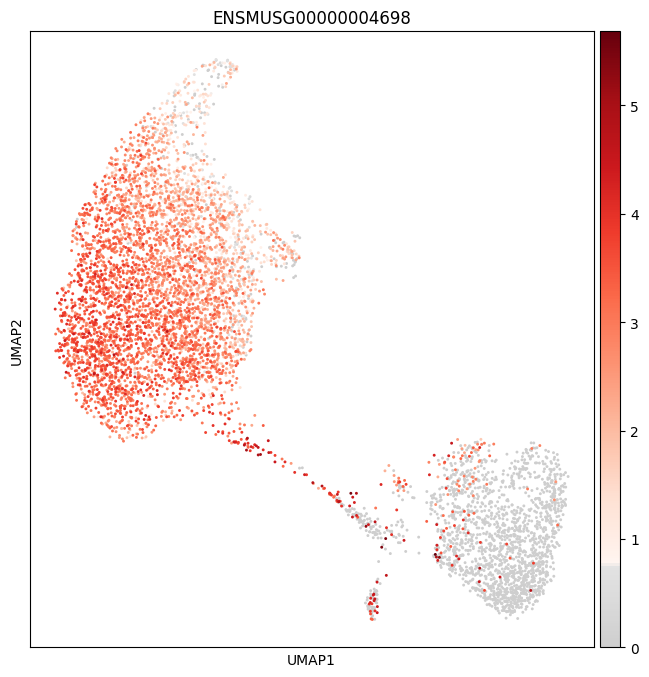

Encrypted symbol for  Muc13 is  ENSMUSG00000022824


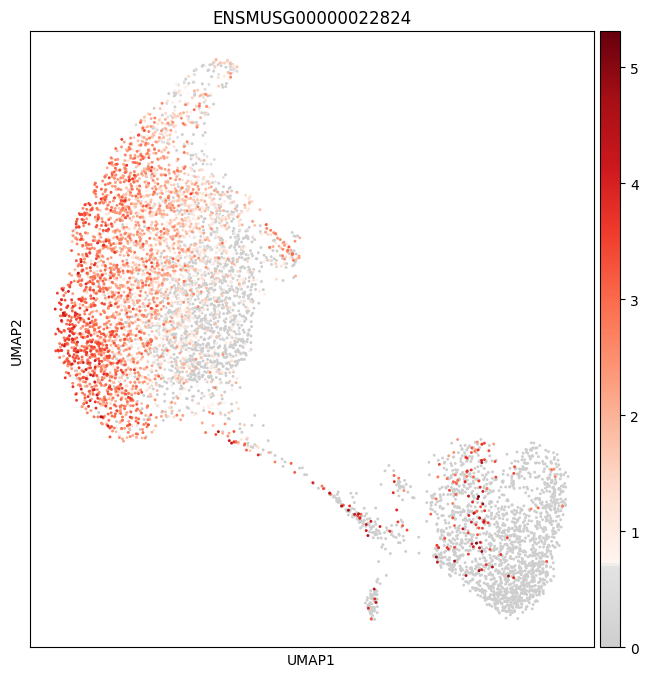

Encrypted symbol for  Hif1a is  ENSMUSG00000021109


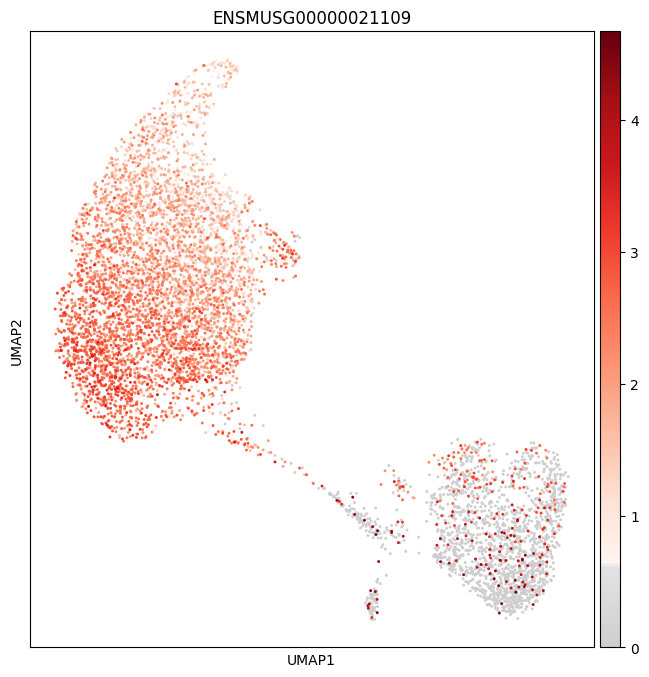

Encrypted symbol for  Pip5k1b is  ENSMUSG00000024867


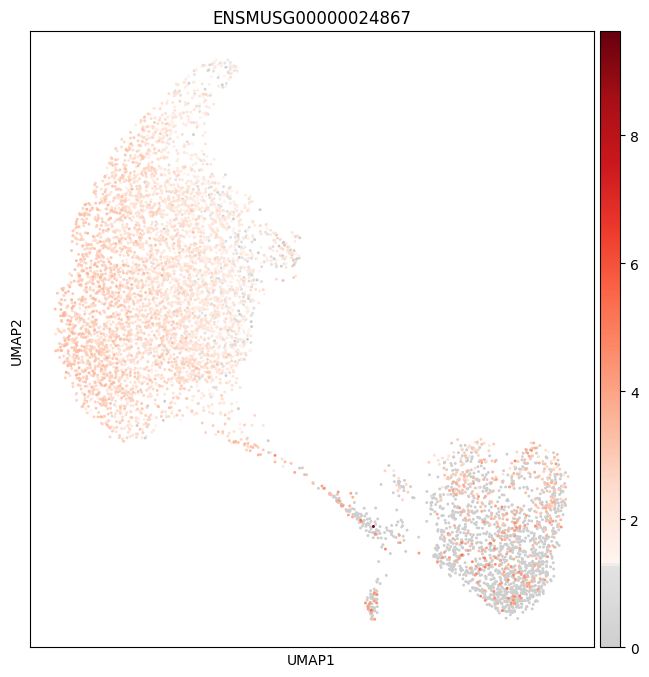

In [15]:
gene_symbols = ['Hdac9', 'Muc13', 'Hif1a', 'Pip5k1b']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/1_9591_TEBBO_Cluster1_' + gene_symbol + '.pdf')


## Cluster 2

Encrypted symbol for  S100a6 is  ENSMUSG00000001025


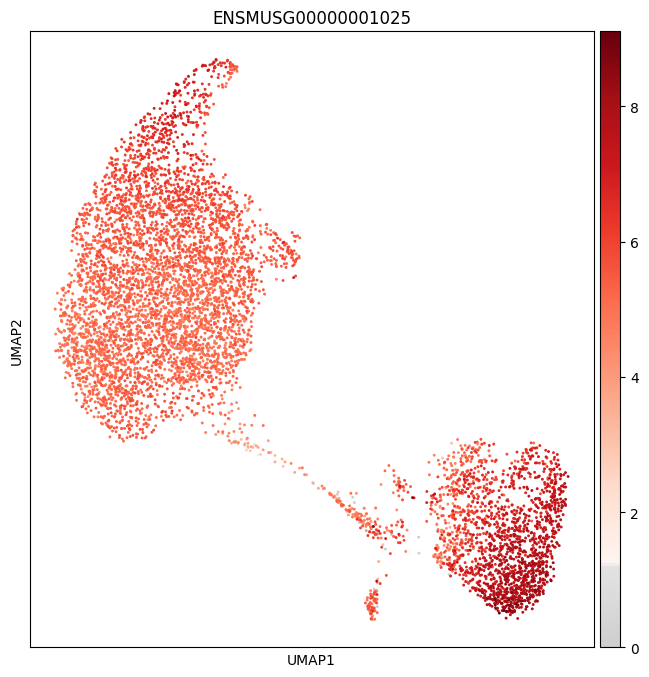

Encrypted symbol for  Crip1 is  ENSMUSG00000006360


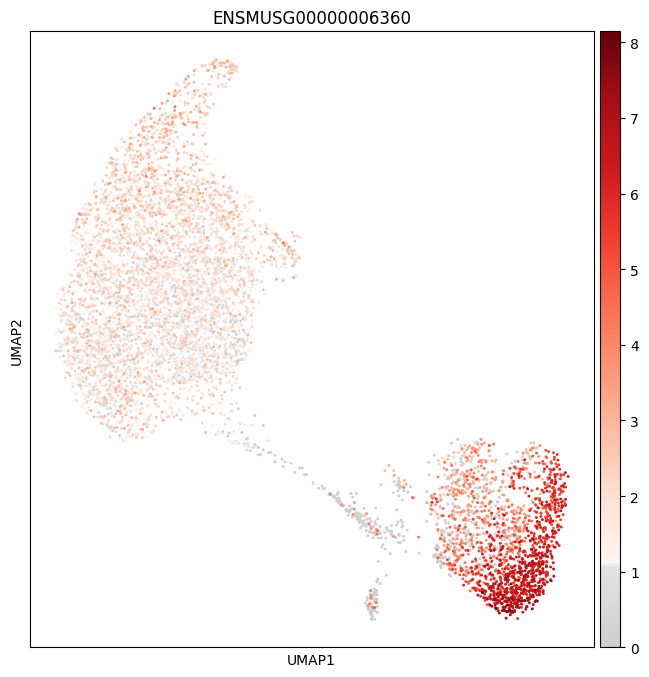

Encrypted symbol for  Gsta1 is  ENSMUSG00000074183


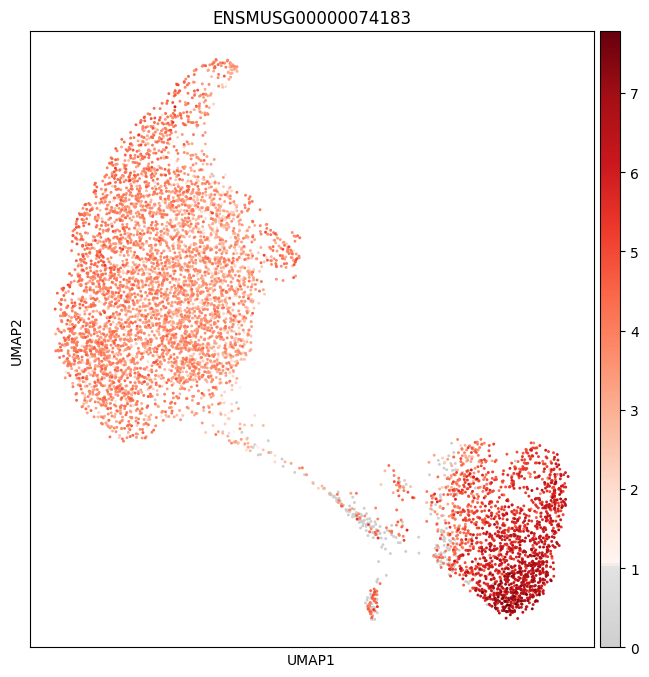

Encrypted symbol for  Krt8 is  ENSMUSG00000049382


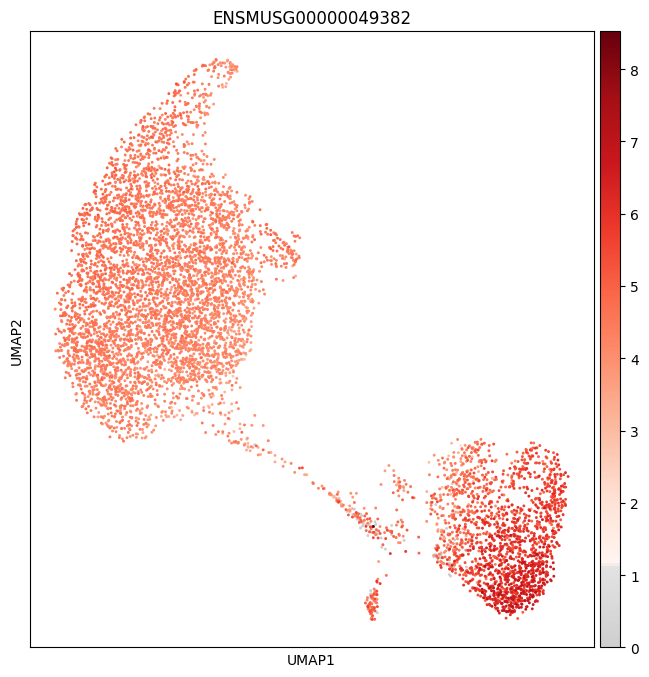

In [16]:
gene_symbols = ['S100a6', 'Crip1', 'Gsta1', 'Krt8']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/1_9591_TEBBO_Cluster2_' + gene_symbol + '.pdf')


## Cluster 3

Encrypted symbol for  Vim is  ENSMUSG00000026728


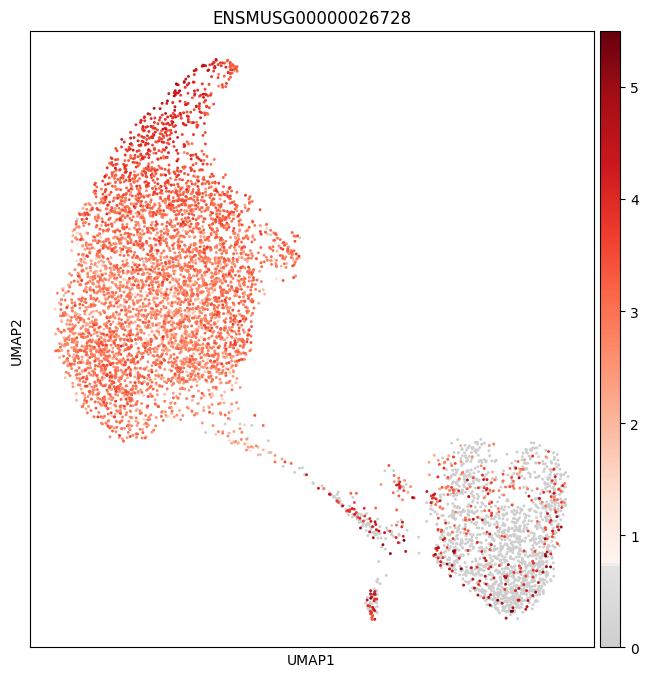

Encrypted symbol for  Igfbp7 is  ENSMUSG00000036256


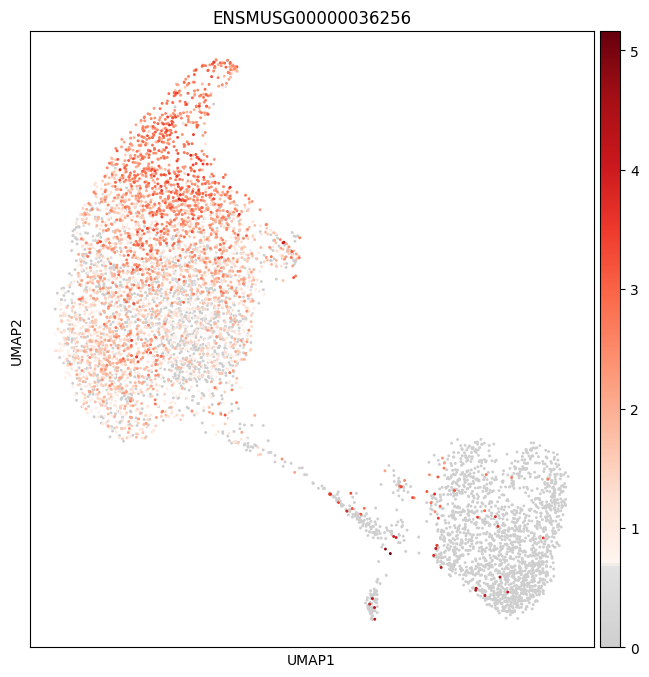

Encrypted symbol for  Dbi is  ENSMUSG00000026385


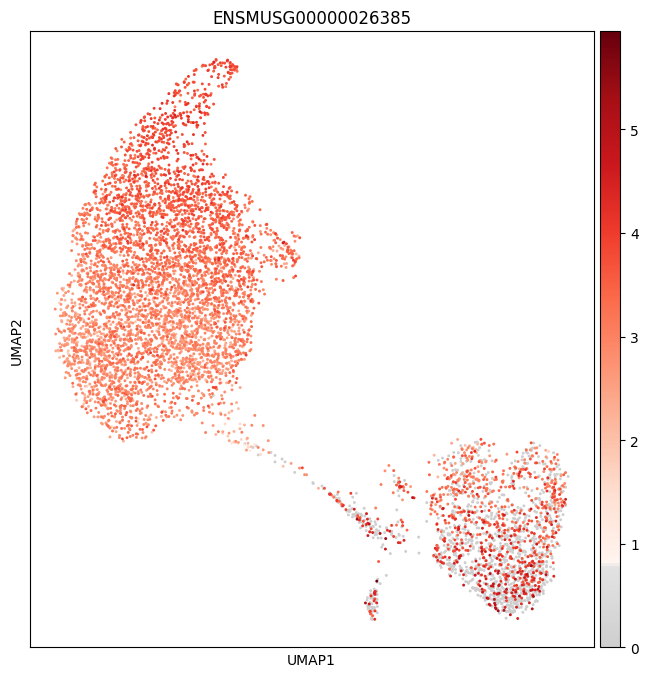

Encrypted symbol for  Ndufa4 is  ENSMUSG00000029632


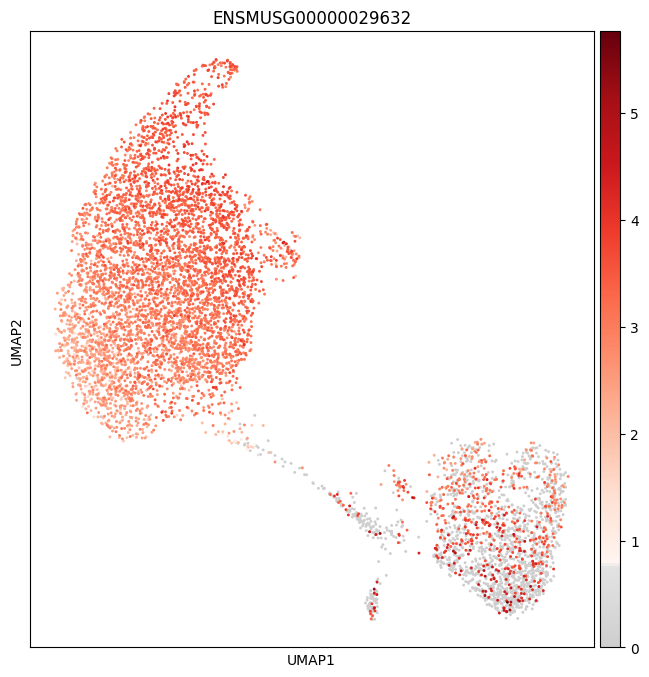

In [18]:
gene_symbols = ['Vim', 'Igfbp7', 'Dbi', 'Ndufa4']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/1_9591_TEBBO_Cluster3_' + gene_symbol + '.pdf')


## Cluster 4

Encrypted symbol for  Cmss1 is  ENSMUSG00000022748


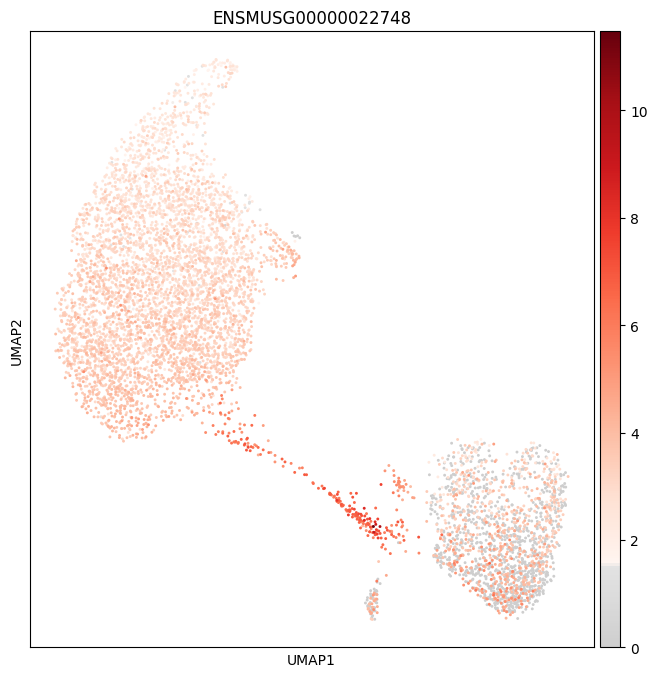

Encrypted symbol for  Grik1 is  ENSMUSG00000022935


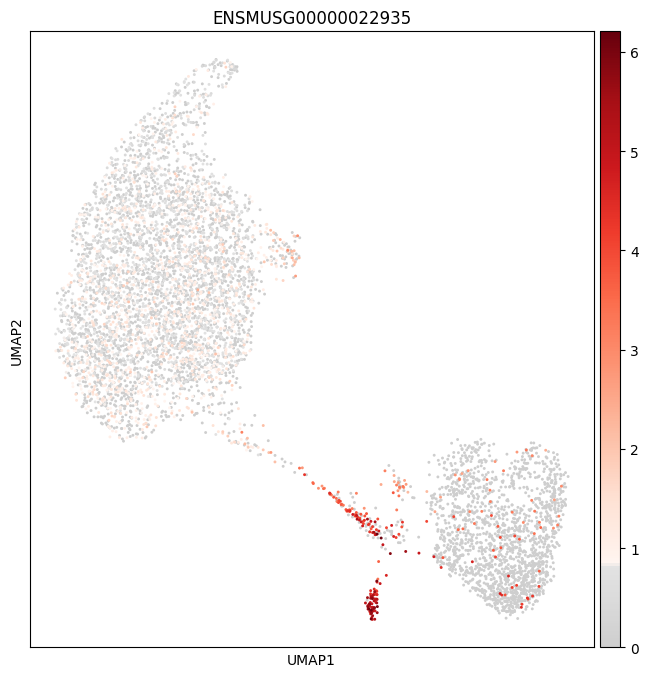

Encrypted symbol for  Lrp1b is  ENSMUSG00000049252


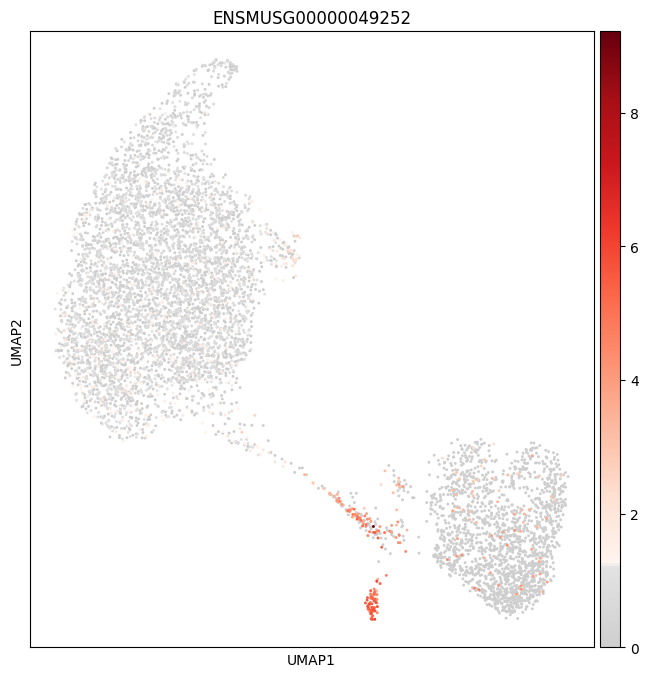

In [19]:
gene_symbols = ['Cmss1', 'Grik1', 'Lrp1b']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/1_9591_TEBBO_Cluster4_' + gene_symbol + '.pdf')


In [ ]:
gene_symbols = ['Rps28', 'Rpl36', 'Rplp1']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/1_9591_TEBBO_Cluster5_' + gene_symbol + '.pdf')
